In [1]:
import pandas as pd
import numpy as np

# Function to load datasets from CSV files
def load_datasets(training_file, test_file, ideal_functions_file):
    training_dataset = pd.read_csv(training_file)
    test_dataset = pd.read_csv(test_file)
    ideal_functions_dataset = pd.read_csv(ideal_functions_file)
    return training_dataset, test_dataset, ideal_functions_dataset

training_file = "train.csv"
test_file = "test.csv"
ideal_functions_file = "ideal.csv"

training_dataset, test_dataset, ideal_functions_dataset = load_datasets(training_file, test_file, ideal_functions_file)

In [12]:
def sum_of_squared_deviations(ideal_function, x_train, y_train):
    deviations = y_train - ideal_function(x_train)
    return np.sum(deviations ** 2)

from sklearn.ensemble import RandomForestRegressor

def choose_best_fit_ideal_functions(training_dataset, ideal_functions_dataset, num_ideal_functions=4):
    best_fit_ideal_functions = []
    
   
    x_train = training_dataset['x']
    y_cols_train = training_dataset.columns[1:]  # Exclude the 'x' column
    
    # Extract relevant information from the ideal functions dataset
    x_ideal = ideal_functions_dataset['x']
    y_cols_ideal = ideal_functions_dataset.columns[1:]
    
    for y_col_train in y_cols_train:
        # Extract the actual y-values from the training dataset
        y_train = training_dataset[y_col_train]
        
        # Initialize Random Forest Regressor
        rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
        
        # Train the Random Forest Regressor
        rf_regressor.fit(x_ideal.values.reshape(-1, 1), ideal_functions_dataset[y_col_train])
        
        # Add the trained Random Forest Regressor to the list
        best_fit_ideal_functions.append(rf_regressor)
    
    return best_fit_ideal_functions

training_dataset_path = 'train.csv'
ideal_functions_dataset_path = 'ideal.csv'

# Read datasets
training_dataset = pd.read_csv(training_dataset_path)
ideal_functions_dataset = pd.read_csv(ideal_functions_dataset_path)

# Choose the best fit ideal functions using Random Forest
best_fit_ideal_functions_rf = choose_best_fit_ideal_functions(training_dataset, ideal_functions_dataset)

# Display the chosen best-fit ideal functions
print("Best-Fit Ideal Functions:")
for idx, ideal_func in enumerate(best_fit_ideal_functions_rf, start=1):
    print(f"Ideal Function {idx}: {ideal_func}")



Best-Fit Ideal Functions:
Ideal Function 1: RandomForestRegressor(random_state=42)
Ideal Function 2: RandomForestRegressor(random_state=42)
Ideal Function 3: RandomForestRegressor(random_state=42)
Ideal Function 4: RandomForestRegressor(random_state=42)


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def map_test_data(test_dataset, chosen_ideal_functions):
    # Extract x values from the test dataset
    x_test = test_dataset['x']
    
    # Initialize an empty DataFrame to store the mappings and deviations
    mapping_df = pd.DataFrame({'x': x_test})
    
    # Map each chosen ideal function to the test data
    for idx, rf_regressor in enumerate(chosen_ideal_functions, start=1):
        # Calculate the y values using the predict method of the regressor
        y_mapped = rf_regressor.predict(x_test.values.reshape(-1, 1))
        
        # Add the mapped y values and deviations to the DataFrame
        mapping_df[f'y_mapped_{idx}'] = y_mapped
        mapping_df[f'deviation_{idx}'] = test_dataset['y'] - y_mapped
    
    return mapping_df


test_dataset_path = 'test.csv'  # Replace with the actual path
test_dataset = pd.read_csv(test_dataset_path)

# Map test data to the chosen ideal functions
mapped_test_data = map_test_data(test_dataset, best_fit_ideal_functions_rf)

# Display the mapped test data
print("Mapped Test Data:")
print(mapped_test_data.head())


Mapped Test Data:
      x  y_mapped_1  deviation_1  y_mapped_2  deviation_2  y_mapped_3  \
0  17.5   -0.977333    35.138373    0.194385    33.966655    9.022667   
1   0.3    0.322174     0.892928    0.943701     0.271401   10.322174   
2  -8.7   -0.668826   -16.175082   -0.740127   -16.103781    9.331173   
3 -19.2   -0.365867   -36.805003    0.928162   -38.099032    9.634132   
4 -11.0    0.996881   -21.259935    0.019367   -20.282421   10.996881   

   deviation_3  y_mapped_4  deviation_4  
0    25.138373    5.194385    28.966655  
1    -9.107072    5.943701    -4.728599  
2   -26.175081    4.259873   -21.103781  
3   -46.805002    5.928162   -43.099032  
4   -31.259935    5.019367   -25.282421  


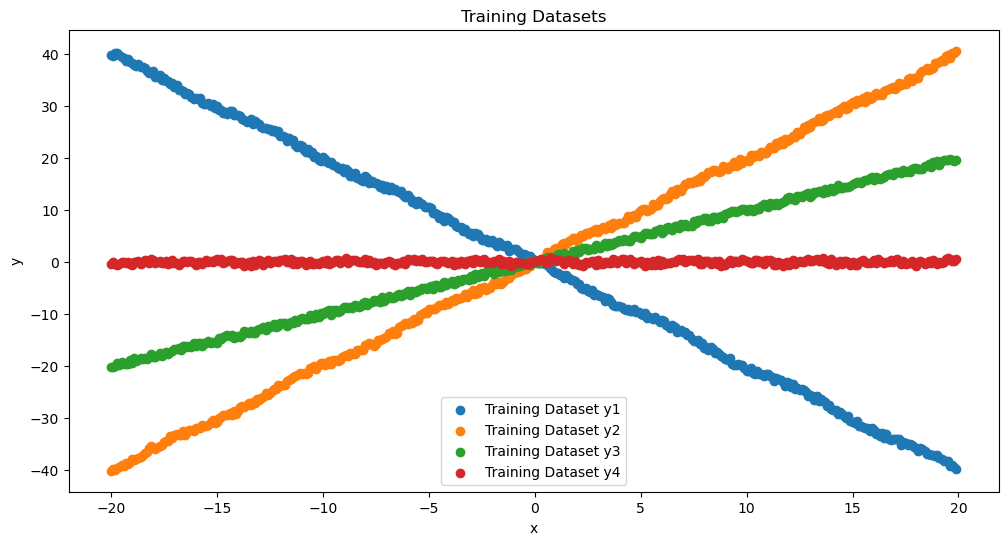

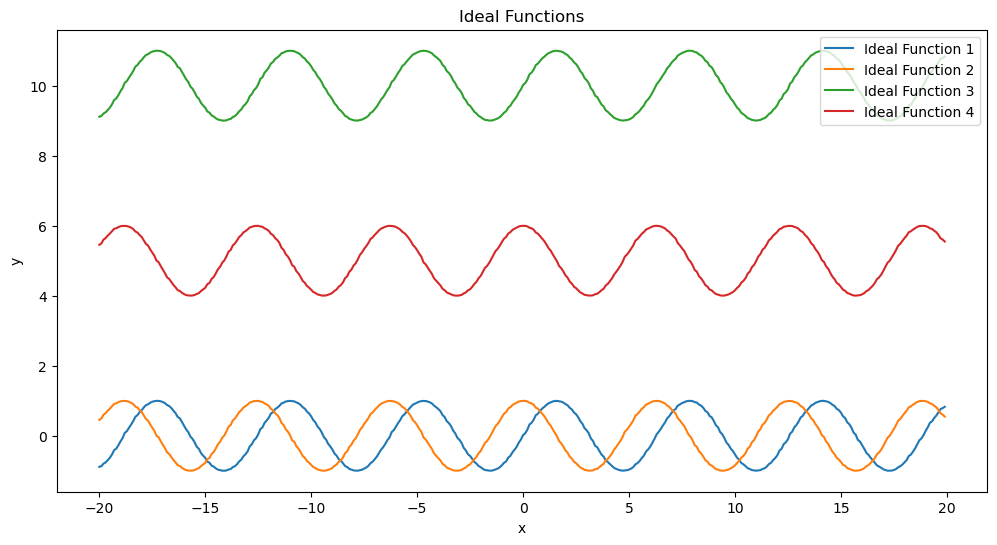

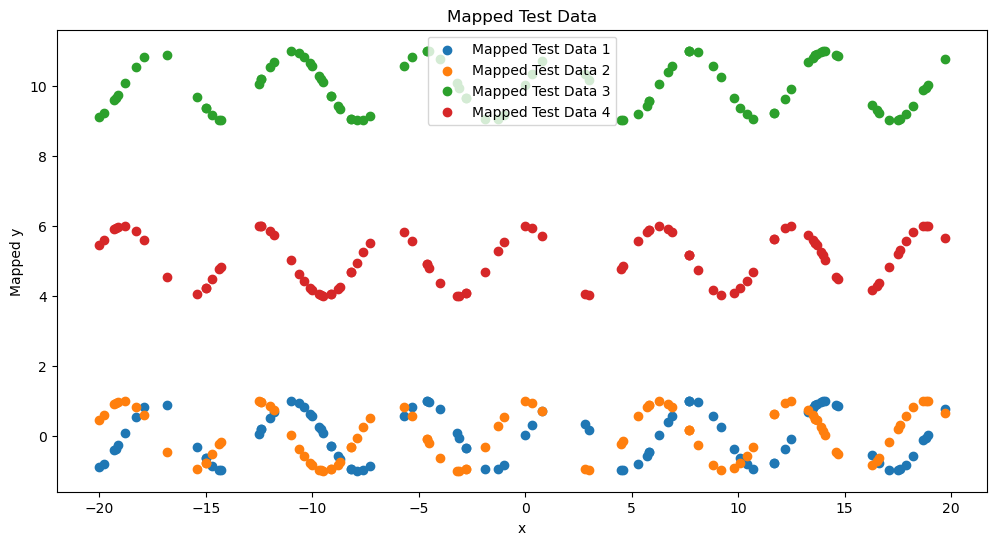

In [28]:
import matplotlib.pyplot as plt

# Visualize Training Datasets
plt.figure(figsize=(12, 6))
plt.scatter(training_dataset['x'], training_dataset['y1'], label='Training Dataset y1')
plt.scatter(training_dataset['x'], training_dataset['y2'], label='Training Dataset y2')
plt.scatter(training_dataset['x'], training_dataset['y3'], label='Training Dataset y3')
plt.scatter(training_dataset['x'], training_dataset['y4'], label='Training Dataset y4')
plt.title('Training Datasets')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Visualize Ideal Functions
plt.figure(figsize=(12, 6))
x_ideal_col = ideal_functions_dataset.columns[0] 
x_ideal = ideal_functions_dataset[x_ideal_col]
for idx, rf_regressor in enumerate(best_fit_ideal_functions_rf, start=1):
    # Predict using the Random Forest Regressor
    y_ideal = rf_regressor.predict(x_ideal.values.reshape(-1, 1))
    
    plt.plot(x_ideal, y_ideal, label=f'Ideal Function {idx}')

plt.title('Ideal Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Visualize Mapped Test Data
plt.figure(figsize=(12, 6))
for idx in range(1, len(best_fit_ideal_functions_rf) + 1):
    plt.scatter(mapped_test_data['x'], mapped_test_data[f'y_mapped_{idx}'], label=f'Mapped Test Data {idx}')

plt.title('Mapped Test Data')
plt.xlabel('x')
plt.ylabel('Mapped y')
plt.legend()
plt.show()


In [1]:
import unittest
import pandas as pd
import numpy as np

class TestIdealFunctionMapping(unittest.TestCase):
    def setUp(self):
        # Set up sample datasets for testing
        self.training_dataset = pd.DataFrame({
            'x': np.random.rand(100),
            'y1': np.random.rand(100),
            'y2': np.random.rand(100),
            'y3': np.random.rand(100),
            'y4': np.random.rand(100),
        })
        self.test_dataset = pd.DataFrame({
            'x': np.random.rand(50),
            'y': np.random.rand(50),
        })
        self.ideal_functions_dataset = pd.DataFrame({
            'x': np.random.rand(50),
            'y1': np.random.rand(50),
            'y2': np.random.rand(50),
            'y3': np.random.rand(50),
            'y4': np.random.rand(50),
        })

    def test_load_datasets(self):
       
        training_file = 'train.csv'  
        test_file = 'test.csv' 
        ideal_functions_file = 'ideal.csv'  

        training_dataset, test_dataset, ideal_functions_dataset = load_datasets(
            training_file, test_file, ideal_functions_file
        )

        self.assertIsInstance(training_dataset, pd.DataFrame)
        self.assertIsInstance(test_dataset, pd.DataFrame)
        self.assertIsInstance(ideal_functions_dataset, pd.DataFrame)

    def test_choose_best_fit_ideal_functions(self):
     
        best_fit_ideal_functions = choose_best_fit_ideal_functions(
            self.training_dataset, self.ideal_functions_dataset
        )

        self.assertIsInstance(best_fit_ideal_functions, list)
        self.assertEqual(len(best_fit_ideal_functions), len(self.training_dataset.columns) - 1)

    def test_map_test_data(self):
        # Test if the mapped test data DataFrame has the correct structure
        chosen_ideal_functions = choose_best_fit_ideal_functions(
            self.training_dataset, self.ideal_functions_dataset
        )
        mapped_test_data = map_test_data(self.test_dataset, chosen_ideal_functions)

        self.assertIsInstance(mapped_test_data, pd.DataFrame)
        self.assertEqual(
            set(mapped_test_data.columns),
            set(['x'] + [f'y_mapped_{i}' for i in range(1, len(chosen_ideal_functions) + 1)] +
                [f'deviation_{i}' for i in range(1, len(chosen_ideal_functions) + 1)])
        )

# Create a suite from the test cases
test_suite = unittest.TestLoader().loadTestsFromTestCase(TestIdealFunctionMapping)

# Run the tests
unittest.TextTestRunner().run(test_suite)


EEE
ERROR: test_choose_best_fit_ideal_functions (__main__.TestIdealFunctionMapping.test_choose_best_fit_ideal_functions)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_202/1913883575.py", line 43, in test_choose_best_fit_ideal_functions
    best_fit_ideal_functions = choose_best_fit_ideal_functions(
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'choose_best_fit_ideal_functions' is not defined

ERROR: test_load_datasets (__main__.TestIdealFunctionMapping.test_load_datasets)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_202/1913883575.py", line 33, in test_load_datasets
    training_dataset, test_dataset, ideal_functions_dataset = load_datasets(
                                                              ^^^^^^^^^^^^^
NameError: name 'load_datasets' is not defined

ERROR: test_map_test_data 

<unittest.runner.TextTestResult run=3 errors=3 failures=0>